In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline
from sklearn.datasets import make_moons

## 2. setup Global Parameters

In [2]:
inpDir='../input'
outDir='../output'
RANDOM_STATE=24
np.random.seed(RANDOM_STATE) # set random seed for reproducible result

In [3]:
EPOCHS=2000 # number of epochs
ALPHA=0.1 # Learning rate

In [4]:
# parameters for Matplotlib
params={'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',}
plt.rcParams.update(params)
CMAP='brg'

In [5]:
##Setting X,y partitions
X, y= make_moons(n_samples=1000, shuffle=True, 
                 noise=0.2, random_state=RANDOM_STATE)

In [6]:
##Conversion to DataFrame
data_df= pd.DataFrame(X, columns=['A', 'B'])
data_df['target']=y

In [7]:
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [8]:
data_df.describe()

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


<AxesSubplot: xlabel='A', ylabel='B'>

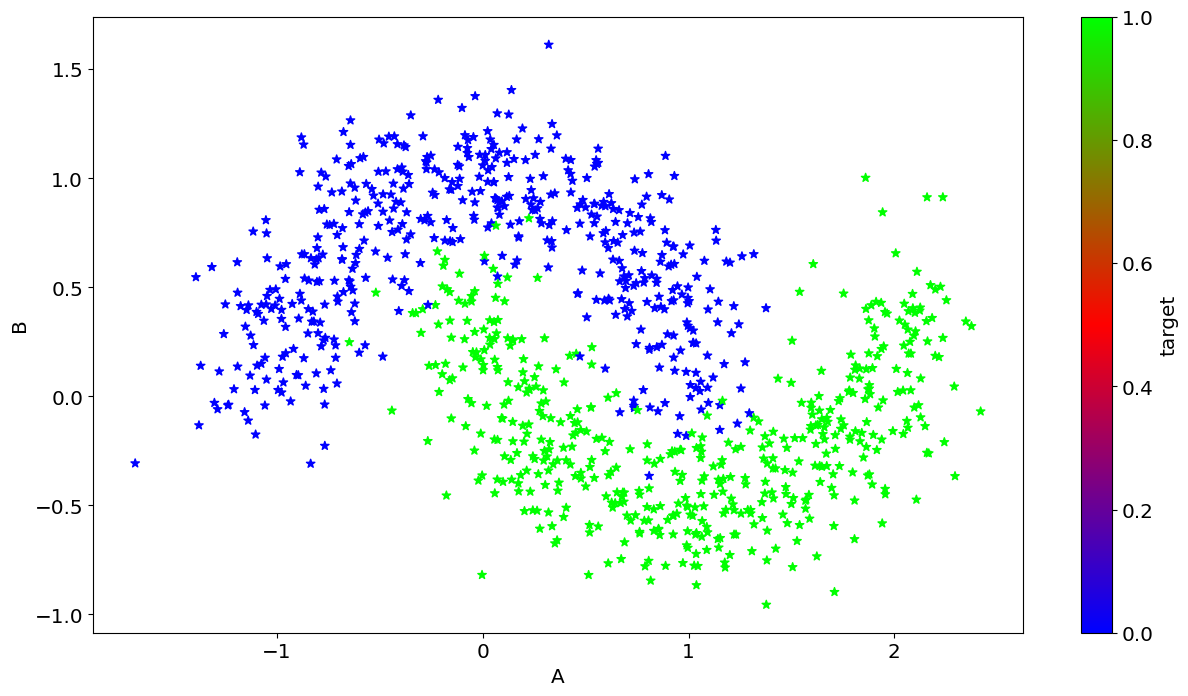

In [9]:
##Plotting the 2 Variable Dataset
data_df.plot.scatter('A', 'B', s=40, marker='*', c='target', cmap=CMAP)

In [10]:
##Splitting the Data into TRAIN, TEST sets
data_train, data_test = data_df[:900], data_df[900:]

In [11]:
data_train.shape

(900, 3)

In [12]:
##DEFINITIONS
#####################################################
def predict(row, weights):
    '''
    Parameters
    ----------
    row : current Row value       
    weights : current Weight
        
    Returns
    -------
    0 if sum is negative, else 1. Simplest Activation function
    '''
    z= weights[0]
    
    for i in range(len(row) - 1):
        
        z=z + weights[i+1] * row[i]
        
    return 1 if z>=0 else 0

In [13]:
##Defining the Function for Training
def fn_train_weights(train, alpha, n_epoch):
    '''
    Parameters
    ----------
    train : Training Set        
    alpha : Learning Rate
    n_epoch : Number of iterations of training

    Returns
    -------
    errors: list
    weights: list

    '''
    ##Appending the Errors in list
    errors=[]
    
    ##Initialize Weights. Can be Zero, but we keep it small
    weights=np.random.rand(train.shape[1])
    
    ##Finding the m; number of samples
    m=train.shape[0]
    
    ###Epochs is number of Training Cycles
    for epoch in range(n_epoch):
        ##Sum of all found Errors
        sum_error= 0.0
     
    ##Row wise iteration over TRAINING SET    
        for row in train:

            ##Predictions
            prediction = predict(row, weights)

            ##Calculating Error
            dz=prediction-row[-1]

            ##Sum of Error, updated and taking Square for magnitude
            sum_error += (prediction-row[-1])**2

            ##Updating the Weights
            weights[0] = weights[0] - alpha * dz / m

            for i in range(len(row)-1):

                weights[i+1]= weights[i+1] -  alpha * dz *row[i] / m
            
        errors.append(sum_error/m)
        
    return errors, weights

In [14]:
##Calling the defined Function

alpha= ALPHA

n_epochs= EPOCHS

errors, weights= fn_train_weights(data_train.values, alpha, n_epochs)

print('-'*54)
print("The obtained weights are::\n",weights)

------------------------------------------------------
The obtained weights are::
 [-9.38077750e-05  2.78684546e-04 -4.59729119e-04]


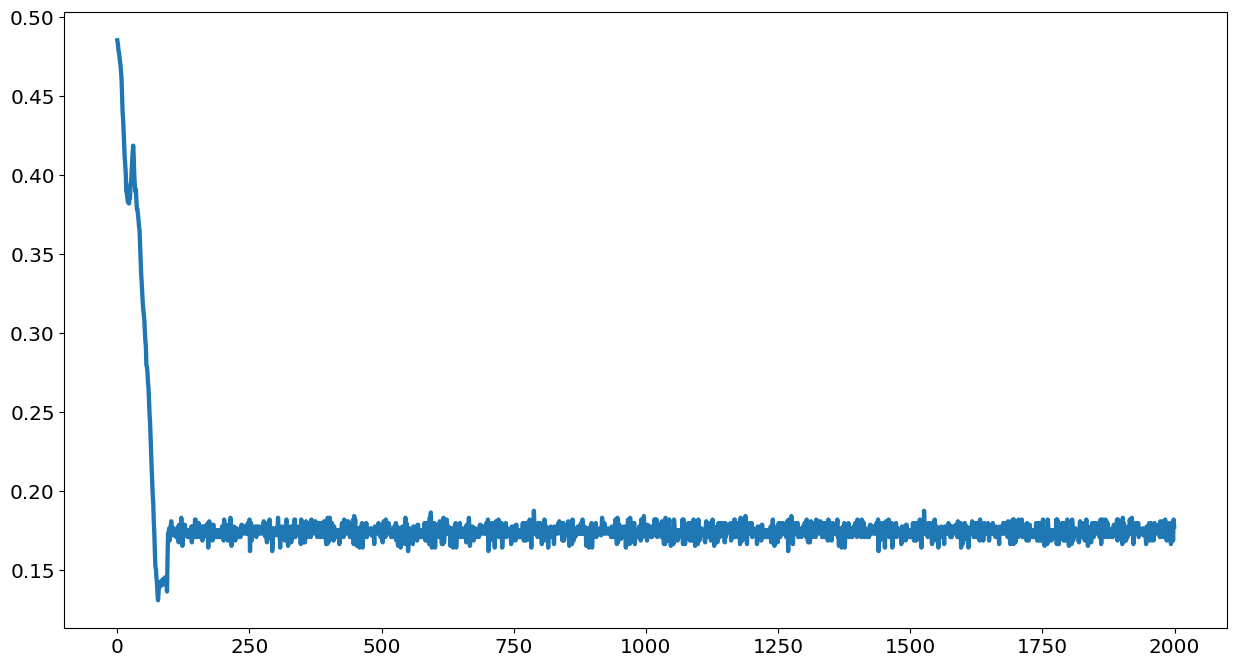

In [16]:
##Plotting the Error
fig, ax= plt.subplots()

ax.plot(errors, linewidth=3.1)
plt.show()

In [17]:
###Using Function on Train Dataset
predictions=[]

for row in data_train.values:
    
    prediction= predict(row, weights)
    
    predictions.append(prediction)
    
accuracy_score(data_train.values[:,-1], predictions)

0.8411111111111111

In [18]:
#####################################################
###Using Function on Test Dataset
predictions=[]

for row in data_test.values:
    
    prediction= predict(row, weights)
    
    predictions.append(prediction)
    
accuracy_score(data_test.values[:,-1], predictions)

0.89